In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**<h1><center>Diabetics Prediction</center></h1>**

**<u><h3>Problem Statement</h3></u>**

In this project we are using Machine Learning models to predict whether patient has diabetes or not. Here we will use PIMA Indians Diabetes dataset.

**<h3>Contents</h3>**

1. Importing the Libraries

2. Loading Data

3. Checking Distribution

4. Treating Imbalanced dataset

5. Treating Null Values

6. Feature Encoding

**<h3>1. Importing libraries</h3>**

Here we will load required libraries, pandas and numpy will be used for data wrangling, and matplotlib and seaborn will be used for visualization.

In [6]:
import pandas as pd
import numpy as np

import seaborn as sb
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

**<h3>2. Loading Data</h3>**

Here we will load train and test data set , also we will get some basic information about the dataset.

In [7]:
train_data = pd.read_csv("/content/drive/My Drive/Diabetes Prediction/Data Files/diabetes.csv")

train_data.shape

(768, 9)

In [8]:
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This dataset has 768 observations and Nine columns. `Outcome` is dependent features. Here we need to predict `Outcome` column .

All columns are numerical columns. 

**<h3>3. Checking Distribution**</h2>

- Numerical Features : For Numerical features we can use distplot or hist plot to check distribution. 

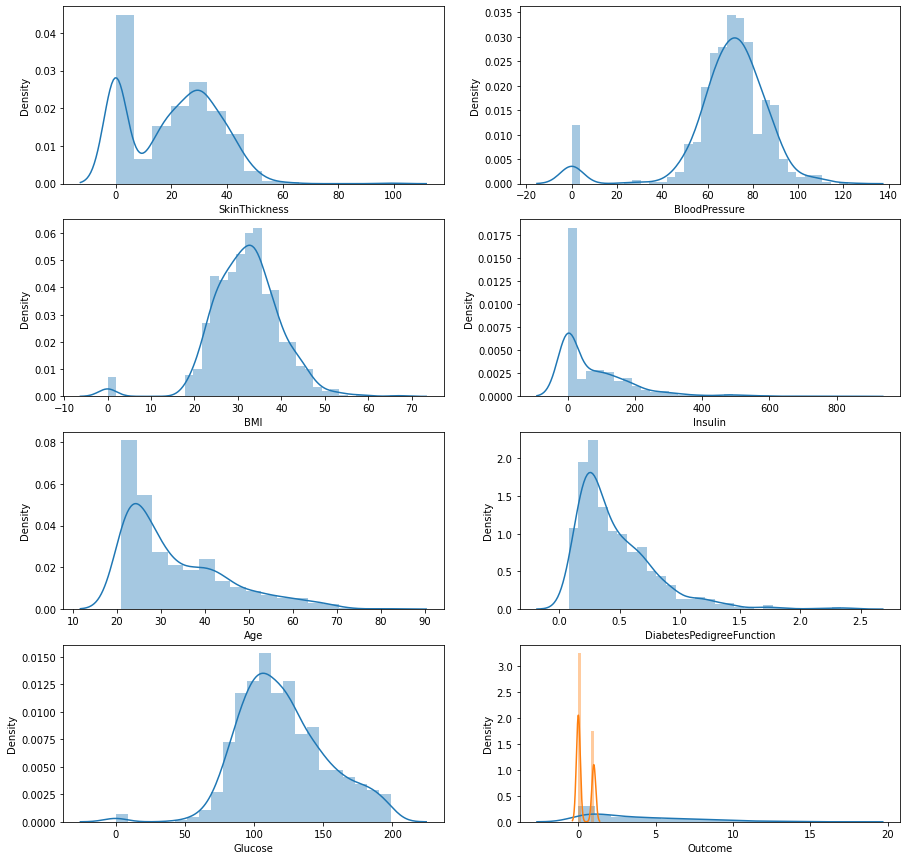

In [10]:


def plot_distplot(numerical_features):
    """
    This function is used to plot distplot.
    Parameter
    ----------
      numerical_features : list()
        list of columns
    Returns
    --------
      None
    """
    fig, axes = plt.subplots(nrows = len(numerical_features)//2, 
                             ncols = 2, 
                             figsize = (15,15)
                             )
    for i , feature in enumerate(numerical_features):
        sb.distplot(train_data[feature],
                     ax = axes[(i//2)-1, int(i%2)-1])
    

numerical_features = train_data.select_dtypes(exclude = 'object').columns
plot_distplot(numerical_features)

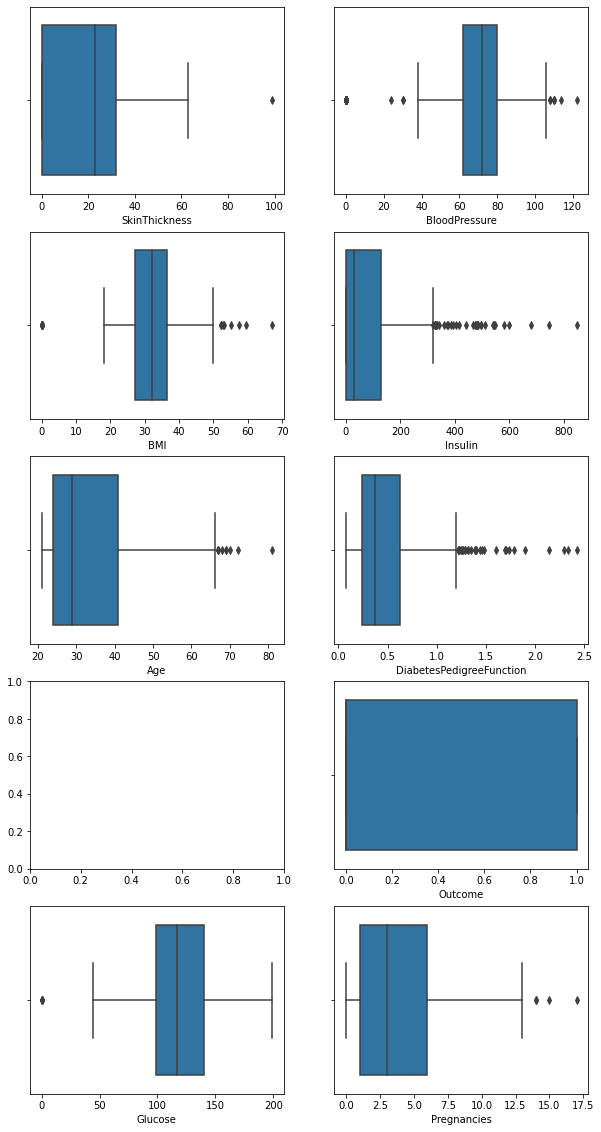

In [11]:
def plot_boxplot(numerical_features):
    """
    This  function is used to plot boxplot.
    Parameter
    ---------
      numerical_features : list()
        List of numerical features
    Returns
    --------
      None
    """
    fig, axes = plt.subplots(nrows = len(numerical_features)//2 + 1, 
                             ncols = 2, 
                             figsize = (10,20)
                             )
    for i , feature in enumerate(numerical_features):
        sb.boxplot(train_data[feature],
                     ax = axes[(i//2)-1, int(i%2)-1])
        

plot_boxplot(numerical_features)

In [12]:
Q1 = train_data['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = train_data['DiabetesPedigreeFunction'].quantile(0.75)

IQR = Q3-Q1

train_data = train_data.loc[train_data['DiabetesPedigreeFunction'] < \
                            (Q3 + 3.5 * IQR)]

train_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
Q1 = train_data['Insulin'].quantile(0.25)
Q3 = train_data['Insulin'].quantile(0.75)

IQR = Q3-Q1

train_data = train_data.loc[train_data['Insulin'] < \
                            (Q3 + 3.5 * IQR)]

train_data                           

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


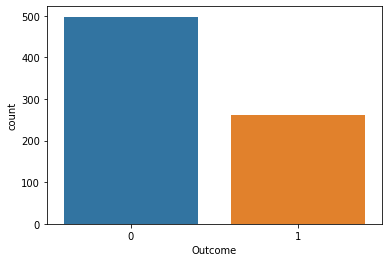

In [14]:
sb.countplot(train_data['Outcome'])

In [15]:
train_data['Outcome'].value_counts()

0    498
1    262
Name: Outcome, dtype: int64

**4.Treating Imbalanced dataset**

We will use sklearn resample function to treat imbalanced dataset. Here we try to increase observations of minority classes.

In [16]:
from sklearn.utils import resample

# Separate majority and minority classes
train_majority = train_data[train_data.Outcome==0]
train_minority = train_data[train_data.Outcome==1]
 
# Upsample minority class
train_minority_upsampled = resample(train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=422,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
train_data = pd.concat([train_majority, train_minority_upsampled])

In [17]:
train_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
485,0,135,68,42,250,42.3,0.365,24,1
45,0,180,66,39,0,42.0,1.893,25,1
43,9,171,110,24,240,45.4,0.721,54,1
749,6,162,62,0,0,24.3,0.178,50,1


**<h4>5. Treating missing values</h4>**

In this section we will impute null values. Usually we use mean and median for numerical features and mode for categorical features.

In [18]:
train_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Their is no missing values. 

**<h4>6. Feature Encoding </h4>**

It is not required because all features are numerical data type. 

In [19]:
train_data.to_csv('/content/drive/My Drive/Diabetes Prediction/\
Data Files/processed_diabetes.csv', 
index=False)